## Import the modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
%load_ext autoreload
%autoreload 2



# Plotting defaults and setting parameters of matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.frameon'] = False

C:\Users\KRISHNA KUMAR\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Load the PPPC and HDMSpectra data files

In [2]:
#load the PPPC data
path = "AtProduction_gammas.dat"
datContent = [i.strip().split() for i in open(path).readlines()]
column_names = datContent.pop(0)

#convert the .dat file into data frame
import csv
PPPC = pd.read_csv("AtProduction_gammas.dat", delim_whitespace=True, names=column_names, )
PPPC.tail(11)
# import dataframe_image as dfi
# df_styled = PPPC.style.background_gradient() 
# dfi.export(df_styled,"PPPC.pdf")


,mDM,"Log[10,x]",eL,eR,e,\[Mu]L,\[Mu]R,\[Mu],\[Tau]L,\[Tau]R,...,Z,g,\[Gamma],h,\[Nu]e,\[Nu]\[Mu],\[Nu]\[Tau],V->e,V->\[Mu],V->\[Tau]
11088,100000,-0.5,0.159540,0.212648,0.186094,0.157832,0.210364,0.184098,0.904902,1.234668,...,0.170775,0.375351,0.057376,0.134274,0.056312,0.055395,0.264751,0.114104,0.023822,0.593225
11089,100000,-0.45,0.152991,0.205504,0.179248,0.151453,0.203455,0.177454,0.790422,1.080175,...,0.122323,0.275998,0.041756,0.097792,0.052415,0.051530,0.225085,0.105202,0.021114,0.391433
11090,100000,-0.4,0.146122,0.197399,0.171760,0.144829,0.195691,0.170260,0.668822,0.915248,...,0.085545,0.195405,0.029691,0.070292,0.048804,0.047936,0.185506,0.095671,0.018330,0.241594
11091,100000,-0.35,0.139656,0.189430,0.164543,0.137997,0.187217,0.162607,0.549877,0.753403,...,0.058622,0.133443,0.020667,0.049929,0.045470,0.044528,0.148302,0.085313,0.015475,0.138203
11092,100000,-0.3,0.133204,0.181190,0.157197,0.131379,0.178748,0.155064,0.437590,0.600180,...,0.039469,0.087898,0.014144,0.035410,0.042271,0.041306,0.114809,0.074035,0.012602,0.072979
11093,100000,-0.25,0.126730,0.172772,0.149751,0.124947,0.170387,0.147667,0.337769,0.463686,...,0.026309,0.056150,0.009584,0.025409,0.039235,0.038286,0.086350,0.062074,0.009834,0.035681
11094,100000,-0.2,0.120376,0.164452,0.142414,0.118679,0.162191,0.140435,0.250219,0.343664,...,0.017353,0.034521,0.006268,0.018649,0.036341,0.035359,0.062713,0.049568,0.007253,0.016084
11095,100000,-0.15,0.114321,0.156519,0.135420,0.112061,0.153479,0.132770,0.180252,0.247822,...,0.011076,0.020960,0.005056,0.014080,0.032615,0.031520,0.044223,0.037050,0.004981,0.006714
11096,100000,-0.1,0.108509,0.148947,0.128728,0.105200,0.144449,0.124824,0.129938,0.178762,...,0.006866,0.013063,0.041196,0.011203,0.028697,0.027460,0.031130,0.025530,0.003149,0.002627
11097,100000,-0.05,0.102214,0.140988,0.121601,0.097452,0.134443,0.115948,0.098153,0.135501,...,0.003653,0.008542,2.149326,0.009287,0.022050,0.020845,0.020311,0.015730,0.001788,0.000973


In [3]:
PPPC.describe()

,mDM,"Log[10,x]",eL,eR,e,\[Mu]L,\[Mu]R,\[Mu],\[Tau]L,\[Tau]R,...,Z,g,\[Gamma],h,\[Nu]e,\[Nu]\[Mu],\[Nu]\[Tau],V->e,V->\[Mu],V->\[Tau]
count,11099,11099,11099,11099,11099,11099,11099,11099,11099,11099,...,11099,11099,11099,11099,11099,11099,11099,11099,11099,11099
unique,63,180,8407,8018,8255,8444,8065,8283,9451,9193,...,7803,7793,7445,7754,5986,5970,6339,103,103,103
top,400,-4.45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0,0
freq,179,62,1094,1505,1135,989,1386,1025,811,1104,...,2506,2340,741,3043,3333,3333,3333,4836,4836,4836


In [4]:
PPPC.columns

Index(['mDM', 'Log[10,x]', 'eL', 'eR', 'e', '\[Mu]L', '\[Mu]R', '\[Mu]',
       '\[Tau]L', '\[Tau]R', '\[Tau]', 'q', 'c', 'b', 't', 'WL', 'WT', 'W',
       'ZL', 'ZT', 'Z', 'g', '\[Gamma]', 'h', '\[Nu]e', '\[Nu]\[Mu]',
       '\[Nu]\[Tau]', 'V->e', 'V->\[Mu]', 'V->\[Tau]'],
      dtype='object')

In [5]:
HDMS = pd.read_csv('df_HDMS.csv')  # read the csv data file
HDMS.drop(['Unnamed: 0'],axis=1,inplace=True)
HDMS.head(5)

,mDM,"Log[10,x]",e,[Nu][e],Mu,[Nu][Mu],Tau,[Nu][Tau],eL,eR,...,g,gamma,Z,W,h,ZL,WL,q,WT,ZT
0,500.0,-5.000000,0.000001,7.858234e-08,6.123503e-07,7.785751e-08,3.555462e-07,7.747605e-08,0.000001,0.000001,...,2.032290e-07,5.346901e-08,0.000002,0.000002,0.000005,8.378979e-07,8.625576e-07,1.627909e-07,0.000003,0.000003
1,500.0,-4.994995,0.000001,8.026240e-08,6.197558e-07,7.952844e-08,3.600021e-07,7.914277e-08,0.000001,0.000001,...,2.083391e-07,5.460105e-08,0.000002,0.000002,0.000005,8.577585e-07,8.814868e-07,1.655645e-07,0.000003,0.000003
2,500.0,-4.989990,0.000001,8.197830e-08,6.272538e-07,8.123508e-08,3.645170e-07,8.084516e-08,0.000001,0.000001,...,2.135907e-07,5.575792e-08,0.000003,0.000003,0.000006,8.781463e-07,9.009009e-07,1.683989e-07,0.000003,0.000003
3,500.0,-4.984985,0.000001,8.373081e-08,6.348453e-07,8.297819e-08,3.690917e-07,8.258397e-08,0.000001,0.000001,...,2.189877e-07,5.694016e-08,0.000003,0.000003,0.000006,8.990762e-07,9.208136e-07,1.712960e-07,0.000003,0.000003
4,500.0,-4.979980,0.000001,8.552067e-08,6.425316e-07,8.475853e-08,3.737269e-07,8.435995e-08,0.000001,0.000001,...,2.245345e-07,5.814834e-08,0.000003,0.000003,0.000006,9.205635e-07,9.412389e-07,1.742574e-07,0.000003,0.000004


In [6]:
HDMS.describe()

,mDM,"Log[10,x]",e,[Nu][e],Mu,[Nu][Mu],Tau,[Nu][Tau],eL,eR,...,g,gamma,Z,W,h,ZL,WL,q,WT,ZT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,9891.666667,-2.500000,0.007357,0.001168,0.004635,0.001081,0.026428,0.001781,0.007410,0.007304,...,0.041209,0.003178,0.035174,0.036421,0.042460,0.035818,0.036519,0.046094,0.036372,0.034852
std,19696.533849,1.444844,0.013348,0.001397,0.008308,0.001285,0.044836,0.002749,0.012784,0.013936,...,0.049451,0.004136,0.040550,0.040276,0.049730,0.042212,0.041869,0.052983,0.040461,0.039814
min,500.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,-3.750000,0.000052,0.000060,0.000042,0.000058,0.000037,0.000058,0.000074,0.000027,...,0.000582,0.000073,0.000651,0.000658,0.001193,0.000477,0.000537,0.000634,0.000718,0.000706
50%,2250.000000,-2.500000,0.000895,0.000615,0.000721,0.000575,0.000898,0.000699,0.001285,0.000477,...,0.013327,0.001552,0.013762,0.019566,0.015353,0.012776,0.015369,0.017724,0.020383,0.014306
75%,9000.000000,-1.250000,0.006884,0.001813,0.004384,0.001651,0.032160,0.002250,0.007534,0.006288,...,0.080620,0.004586,0.068503,0.069362,0.080967,0.069988,0.070414,0.091112,0.069003,0.067784
max,100000.000000,0.000000,0.063212,0.007385,0.043747,0.006114,0.144455,0.020350,0.056421,0.071067,...,0.149020,0.022867,0.117851,0.565469,0.146624,0.121255,0.120783,0.159987,0.847950,0.116443


In [7]:
HDMS.columns

Index(['mDM', 'Log[10,x]', 'e', '[Nu][e]', 'Mu', '[Nu][Mu]', 'Tau',
       '[Nu][Tau]', 'eL', 'eR', '[Mu][L]', '[Mu][R]', '[Tau][L]', '[Tau][R]',
       'c', 'b', 't', 'g', 'gamma', 'Z', 'W', 'h', 'ZL', 'WL', 'q', 'WT',
       'ZT'],
      dtype='object')

## Compare the two Models

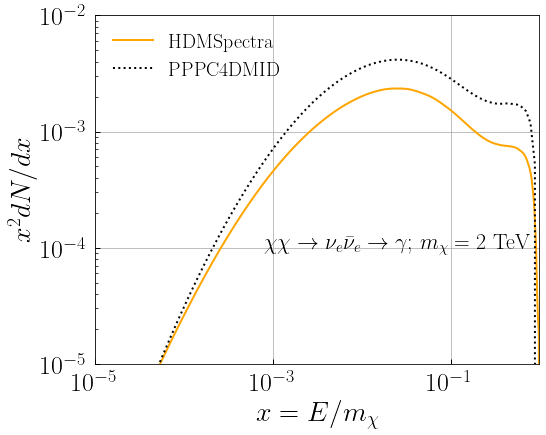

In [20]:
fig, ax = plt.subplots(1, figsize=(10/1.3, 8/1.3))
x = np.logspace(-5.,0.,1000)
mDM=2000  # Set the Mass of DM in GeV --> Choose from data index as required.
  
plt.plot(x,HDMS['[Nu][e]'][14000:15000] ,
         lw=2., c='orange',label='HDMSpectra')




#PPPC (it gives E^2*dN/dE) so we convert it into x^2*dN/dx
x_pppc=np.logspace(-5.0,0.,101)
y1=PPPC['\[Nu]e'][8313:8414]
dNdx_pppc=[]
for i in y1:
    dNdx_pppc.append(float(i))  
    
plt.plot(x_pppc,(x_pppc/2)*dNdx_pppc,lw=2.,label='PPPC4DMID',c='black',linestyle='dotted')





plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-5,1.e0])
plt.ylim([1.e-5,1.e-2])

plt.xlabel(r"$x = E/m_{\chi}$", fontsize=28)
plt.ylabel(r"$x^2 dN/dx$", fontsize=28)
plt.text(8.e-4,1.e-4,r'$\chi \chi \to \nu_e \bar{\nu}_e \to \gamma$; $m_{\chi} =2$ TeV', fontsize=22)
plt.legend()
plt.xticks()
plt.grid()
plt.tight_layout()
plt.savefig("fig0.pdf")
plt.show()



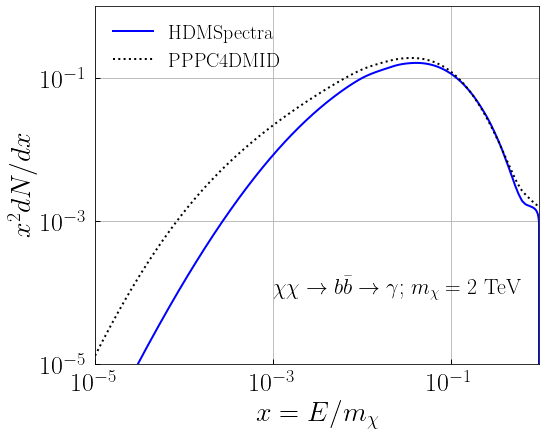

In [19]:
fig, ax = plt.subplots(1, figsize=(10/1.3, 8/1.3))
x = np.logspace(-5.,0.,1000)
mDM=2000   # Set the Mass of DM in GeV. Choose from data index as required.

plt.plot(x,HDMS['b'][14000:15000] ,
         lw=2., c='b',label='HDMSpectra')




#PPPC (it gives E*dN/dE) so we convert it into x^2*dN/dx as we have to compare it from HDMS 
x_pppc=np.logspace(-5.0,0.,101)
y1=PPPC['b'][8313:8414]
dNdx_pppc=[]
for i in y1:
    dNdx_pppc.append(float(i))  
    
plt.plot(x_pppc,(x_pppc/2)*dNdx_pppc,lw=2.,label='PPPC4DMID',c='black',linestyle='dotted')





plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-5,1.e0])
plt.ylim([1.e-5,1.e0])

plt.xlabel(r"$x = E/m_{\chi}$", fontsize=28)
plt.ylabel(r"$x^2 dN/dx$", fontsize=28)
plt.text(1.e-3,1.e-4,r'$\chi \chi \to b \bar{b} \to \gamma$; $m_{\chi} =2$ TeV', fontsize=22)
plt.legend()
plt.xticks()
plt.grid()
plt.tight_layout()
plt.savefig("fig1.pdf")
plt.show()


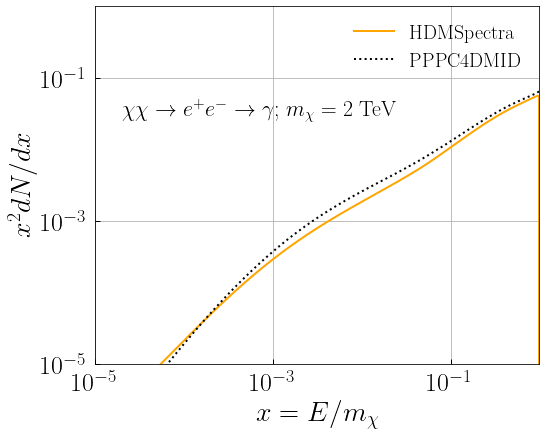

In [15]:
fig, ax = plt.subplots(1, figsize=(10/1.3, 8/1.3))
x = np.logspace(-5.,0.,1000)
mDM=2000   # Set the Mass of DM in GeV. Choose from data index as required.

plt.plot(x,HDMS['e'][14000:15000] ,
         lw=2.0, c='orange',label='HDMSpectra')




#PPPC (it gives E*dN/dE) so we convert it into x^2*dN/dx as we have to compare it from HDMS 
x_pppc=np.logspace(-5.0,0.,101)
y1=PPPC['e'][8313:8414]
dNdx_pppc=[]
for i in y1:
    dNdx_pppc.append(float(i))  
    
plt.plot(x_pppc,(x_pppc/2)*dNdx_pppc,lw=2.0,label='PPPC4DMID',c='black',linestyle='dotted')





plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-5,1.e0])
plt.ylim([1.e-5,1.e0])

plt.xlabel(r"$x = E/m_{\chi}$", fontsize=28)
plt.ylabel(r"$x^2 dN/dx$", fontsize=28)
plt.text(2.e-5,3.e-2,r'$\chi \chi \to e^+ e^- \to \gamma$; $m_{\chi} =2$ TeV', fontsize=22)
plt.legend()
plt.xticks()
plt.grid()
plt.tight_layout()
plt.savefig("fig2.pdf")
plt.show()


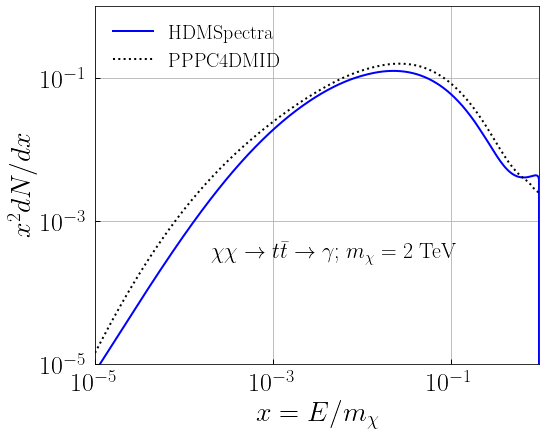

In [14]:
fig, ax = plt.subplots(1, figsize=(10/1.3, 8/1.3))
x = np.logspace(-5.,0.,1000)
mDM=2000   # Set the Mass of DM in GeV. Choose from data index as required.

plt.plot(x,HDMS['t'][14000:15000] ,
         lw=2.0, c='b',label='HDMSpectra')




#PPPC (it gives E*dN/dE) so we convert it into x^2*dN/dx as we have to compare it from HDMS 
x_pppc=np.logspace(-5.0,0.,101)
y1=PPPC['t'][8313:8414]
dNdx_pppc=[]
for i in y1:
    dNdx_pppc.append(float(i))  
    
plt.plot(x_pppc,(x_pppc/2)*dNdx_pppc,lw=2.0,label='PPPC4DMID',c='black',linestyle='dotted')





plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-5,1.e0])
plt.ylim([1.e-5,1.e0])

plt.xlabel(r"$x = E/m_{\chi}$", fontsize=28)
plt.ylabel(r"$x^2 dN/dx$", fontsize=28)
plt.text(2.e-4,3.e-4,r'$\chi \chi \to t \bar{t} \to \gamma$; $m_{\chi} =2$ TeV', fontsize=22)
plt.legend()
plt.xticks()
plt.grid()
plt.tight_layout()
plt.savefig("fig3.pdf")
plt.show()

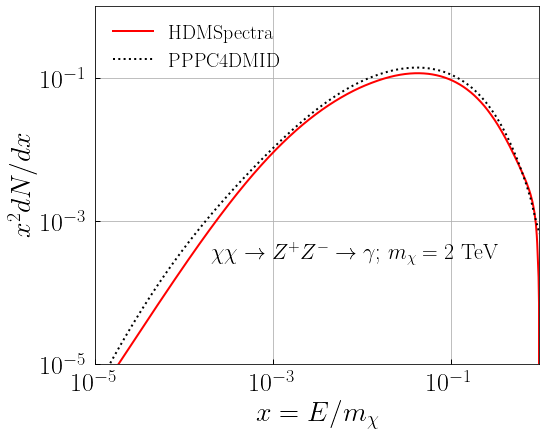

In [20]:
fig, ax = plt.subplots(1, figsize=(10/1.3, 8/1.3))
x = np.logspace(-5.,0.,1000)
mDM=2000   # Set the Mass of DM in GeV. Choose from data index as required.

plt.plot(x,HDMS['Z'][14000:15000] ,
         lw=2.0, c='red',label='HDMSpectra')




#PPPC (it gives E*dN/dE) so we convert it into x^2*dN/dx as we have to compare it from HDMS 
x_pppc=np.logspace(-5.0,0.,101)
y1=PPPC['Z'][8313:8414]
dNdx_pppc=[]
for i in y1:
    dNdx_pppc.append(float(i))  
    
plt.plot(x_pppc,(x_pppc/2)*dNdx_pppc,lw=2.0,label='PPPC4DMID',c='black',linestyle='dotted')





plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-5,1.e0])
plt.ylim([1.e-5,1.e0])

plt.xlabel(r"$x = E/m_{\chi}$", fontsize=28)
plt.ylabel(r"$x^2 dN/dx$", fontsize=28)
plt.text(2.e-4,3.e-4,r'$\chi \chi \to Z^+ Z^- \to \gamma$; $m_{\chi} =2$ TeV', fontsize=22)
plt.legend()
plt.xticks()
plt.grid()
plt.tight_layout()
plt.savefig("fig4.pdf")
plt.show()

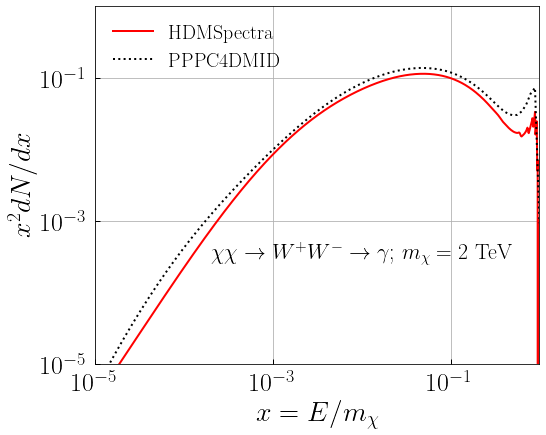

In [21]:
fig, ax = plt.subplots(1, figsize=(10/1.3, 8/1.3))
x = np.logspace(-5.,0.,1000)
mDM=2000   # Set the Mass of DM in GeV. Choose from data index as required.

plt.plot(x,HDMS['W'][14000:15000] ,
         lw=2.0, c='red',label='HDMSpectra')




#PPPC (it gives E*dN/dE) so we convert it into x^2*dN/dx as we have to compare it from HDMS 
x_pppc=np.logspace(-5.0,0.,101)
y1=PPPC['W'][8313:8414]
dNdx_pppc=[]
for i in y1:
    dNdx_pppc.append(float(i))  
    
plt.plot(x_pppc,(x_pppc/2)*dNdx_pppc,lw=2.0,label='PPPC4DMID',c='black',linestyle='dotted')





plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-5,1.e0])
plt.ylim([1.e-5,1.e0])

plt.xlabel(r"$x = E/m_{\chi}$", fontsize=28)
plt.ylabel(r"$x^2 dN/dx$", fontsize=28)
plt.text(2.e-4,3.e-4,r'$\chi \chi \to W^+ W^- \to \gamma$; $m_{\chi} =2$ TeV', fontsize=22)
plt.legend()
plt.xticks()
plt.grid()
plt.tight_layout()
plt.savefig("fig5.pdf")
plt.show()

## Ratio of HDMSpectra from different channels

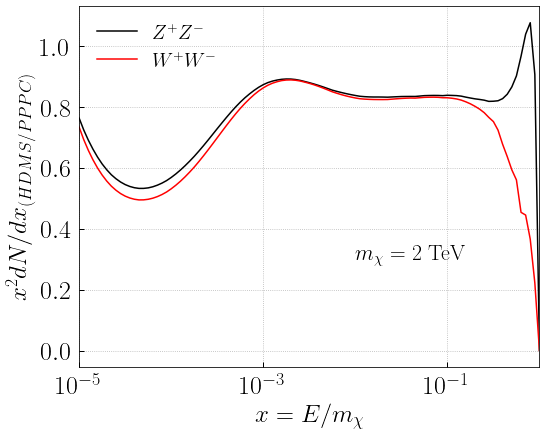

In [11]:
fig, ax = plt.subplots(1, figsize=(10/1.3, 8/1.3))
mDM= 2000 #GeV
x = np.logspace(-5.,0.,101)

#HDMS


val3 = HDMS['Z'].values[14000:15000:10]
val33 = HDMS['Z'].values[14999:15000]
hdms3 = np.concatenate([val3, val33])

val4 = HDMS['W'].values[14000:15000:10]
val44 = HDMS['W'].values[14999:15000]
hdms4 = np.concatenate([val4, val44])



#PPPC (it gives E^2*dN/dE) so we convert it into x^2*dN/dx


y3=PPPC['Z'][8313:8414]
dNdx_pppc3 = []
for i in y3:
    dNdx_pppc3.append(float(i))  
pppc3 = (x/2)*dNdx_pppc3


y4=PPPC['W'][8313:8414]
dNdx_pppc4 = []
for i in y4:
    dNdx_pppc4.append(float(i))  
pppc4 = (x/2)*dNdx_pppc4



#plot the ratio

plt.plot(x,hdms3/pppc3,linestyle='-',c='black',label= r'$Z^+ Z^-$')
plt.plot(x,hdms4/pppc4,linestyle='-',c='red',label= r'$W^+ W^-$')


plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r"$x = E/m_{\chi}$", fontsize=25)
plt.ylabel(r"$x^2 dN/dx_{(HDMS / PPPC)}$", fontsize=25)
plt.text(1.e-2,0.3,r'$m_{\chi} =2$ TeV', fontsize=22)
plt.xlim([1.e-5,1.e0])
plt.legend()
plt.xticks()
plt.grid(linestyle='dotted')
plt.tight_layout()
plt.savefig("fig6.pdf")
plt.show()


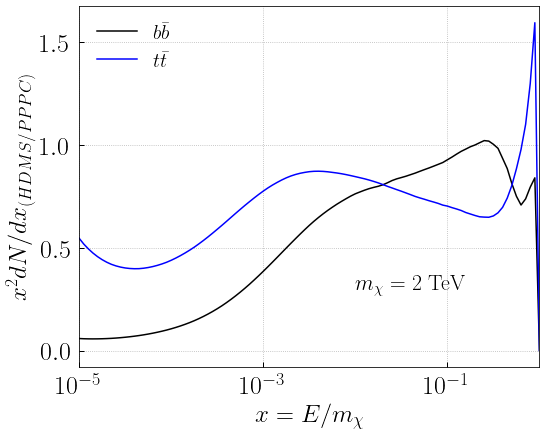

In [12]:
fig, ax = plt.subplots(1, figsize=(10/1.3, 8/1.3))
mDM= 2000 #GeV
x = np.logspace(-5.,0.,101)

#HDMS
val2 = HDMS['b'].values[14000:15000:10]
val22 = HDMS['b'].values[14999:15000]
hdms2 = np.concatenate([val2, val22])

val5 = HDMS['t'].values[14000:15000:10]
val55 = HDMS['t'].values[14999:15000]
hdms5 = np.concatenate([val5, val55])

#PPPC (it gives E^2*dN/dE) so we convert it into x^2*dN/dx
y2=PPPC['b'][8313:8414]
dNdx_pppc2 = []
for i in y2:
    dNdx_pppc2.append(float(i))  
pppc2 = (x/2)*dNdx_pppc2


y5=PPPC['t'][8313:8414]
dNdx_pppc5 = []
for i in y5:
    dNdx_pppc5.append(float(i))  
pppc5 = (x/2)*dNdx_pppc5

#plot the ratio
plt.plot(x,hdms2/pppc2,linestyle='-',c='black',label = r'$b \bar{b}$')
plt.plot(x,hdms5/pppc5,linestyle='-',c='b',label= r'$t \bar{t}$')

plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r"$x = E/m_{\chi}$", fontsize=25)
plt.ylabel(r"$x^2 dN/dx_{(HDMS / PPPC)}$", fontsize=25)
plt.text(1.e-2,0.3,r'$m_{\chi} =2$ TeV', fontsize=22)
plt.legend(loc='upper left')
plt.xlim([1.e-5,1.e0])
plt.xticks()
plt.grid(linestyle='dotted')
plt.tight_layout()
plt.savefig("fig7.pdf")
plt.show()


<ipython-input-13-5c3603883044>:29: RuntimeWarning: invalid value encountered in divide
  plt.plot(x,hdms1/pppc1,linestyle='-',c='black',label=r'$\nu_e \bar{\nu}_e$')


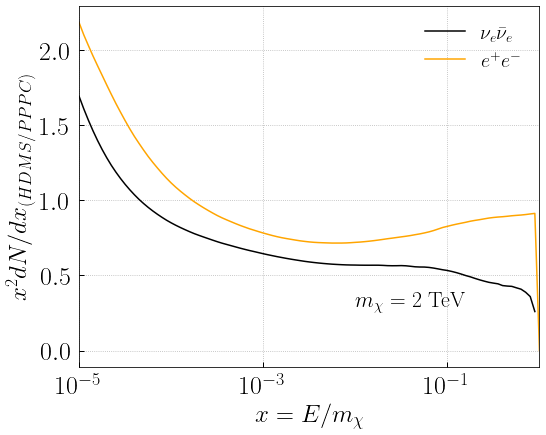

In [13]:
fig, ax = plt.subplots(1, figsize=(10/1.3, 8/1.3))
mDM= 2000 #GeV
x = np.logspace(-5.,0.,101)

#HDMS
val1 = HDMS['[Nu][e]'].values[14000:15000:10]
val11 = HDMS['[Nu][e]'].values[14999:15000]
hdms1 = np.concatenate([val1, val11])


val6 = HDMS['e'].values[14000:15000:10]
val66 = HDMS['e'].values[14999:15000]
hdms6 = np.concatenate([val6, val66])


#PPPC (it gives E^2*dN/dE) so we convert it into x^2*dN/dx
y1=PPPC['\[Nu]e'][8313:8414]
dNdx_pppc1 = []
for i in y1:
    dNdx_pppc1.append(float(i))  
pppc1 = (x/2)*dNdx_pppc1
y6=PPPC['e'][8313:8414]
dNdx_pppc6 = []
for i in y6:
    dNdx_pppc6.append(float(i))  
pppc6 = (x/2)*dNdx_pppc6
#plot the ratio

plt.plot(x,hdms1/pppc1,linestyle='-',c='black',label=r'$\nu_e \bar{\nu}_e$')
plt.plot(x,hdms6/pppc6,linestyle='-',c='orange',label =  r'$e^+ e^-$')

plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r"$x = E/m_{\chi}$", fontsize=25)
plt.ylabel(r"$x^2 dN/dx_{(HDMS / PPPC)}$", fontsize=25)
plt.text(1.e-2,0.3,r'$m_{\chi} =2$ TeV', fontsize=22)
plt.legend()
plt.xticks()
plt.xlim([1.e-5,1.e0])
plt.grid(linestyle='dotted')
plt.tight_layout()
plt.savefig("fig8.pdf")
plt.show()